# 0.3.0 Data pre-processing for clustering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.3.3 Calculate statistics of variables

In [4]:
data = pd.read_csv(path.data_raw_dir("data3.csv"), sep=',')
data.head()

,var1,var2,var3
0,137,1.840,2.898
1,335,0.910,0.687
2,172,4.104,8.326
3,355,6.661,1.582
4,303,15.285,110.750


In [5]:
# Print the average values of the variables in the dataset
print(data.mean())

var1    251.85000
var2      1.92559
var3     12.55028
dtype: float64


In [6]:
# Print the standard deviation of the variables in the dataset
print(data.std())

var1    90.993104
var2     2.583730
var3    34.516362
dtype: float64


In [7]:
# Get the key statistics of the dataset
print(data.describe())

             var1       var2        var3
count  100.000000  100.00000  100.000000
mean   251.850000    1.92559   12.550280
std     90.993104    2.58373   34.516362
min    101.000000    0.04800    0.002000
25%    171.750000    0.61250    0.280750
50%    250.000000    1.17550    1.260500
75%    339.250000    2.20800    5.568000
max    397.000000   15.31200  228.779000


## 0.3.5 Detect skewed variables

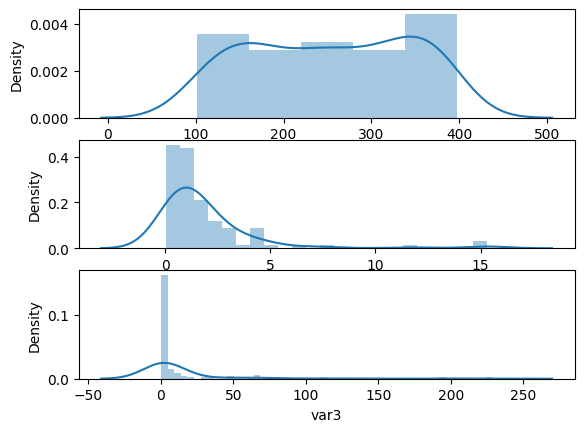

In [8]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['var1'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['var2'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['var3'])

# Show the plot
plt.show()

## 0.3.6 Manage skewness

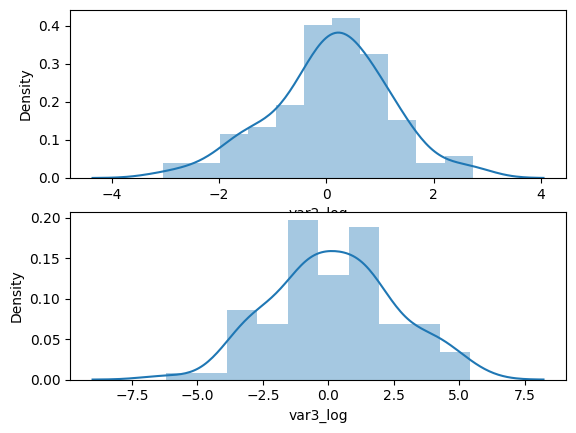

In [9]:
# Apply log transformation to var2
data['var2_log'] = np.log(data['var2'])

# Apply log transformation to var3
data['var3_log'] = np.log(data['var3'])

# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.distplot(data['var2_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.distplot(data['var3_log'])

# Show the plot
plt.show()

## 0.3.8 Center and scale manually

In [10]:
# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00    0.00      0.00     -0.00
std      1.00    1.00    1.00      1.00      1.00
min     -1.66   -0.73   -0.36     -2.83     -2.76
25%     -0.88   -0.51   -0.36     -0.52     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.96    0.11   -0.20      0.64      0.64
max      1.60    5.18    6.26      2.39      2.23


## 0.3.9 Center and scale with StandardScaler()

In [11]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00    0.00     -0.00     -0.00
std      1.01    1.01    1.01      1.01      1.01
min     -1.67   -0.73   -0.37     -2.85     -2.77
25%     -0.88   -0.51   -0.36     -0.53     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.97    0.11   -0.20      0.64      0.65
max      1.60    5.21    6.30      2.41      2.24


## 0.3.11 Visualize RFM distributions

In [12]:
datamart_rfm = pd.read_csv(path.data_raw_dir("rfm_datamart.csv"), sep=',', index_col='CustomerID')
datamart_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.70
12748,1,888,7046.16
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15


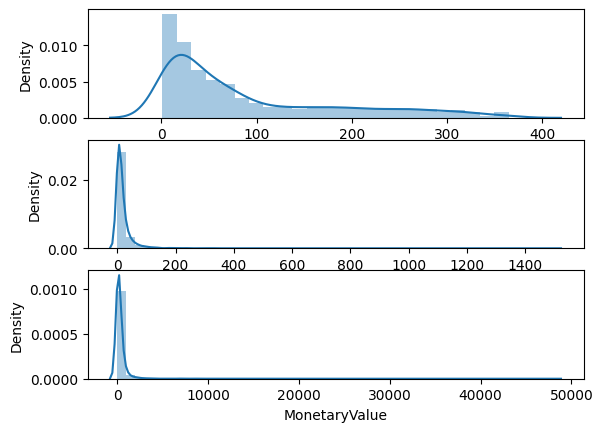

In [13]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

## 0.3.12 Pre-process RFM data

In [14]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

## 0.3.13 Visualize the normalized variables

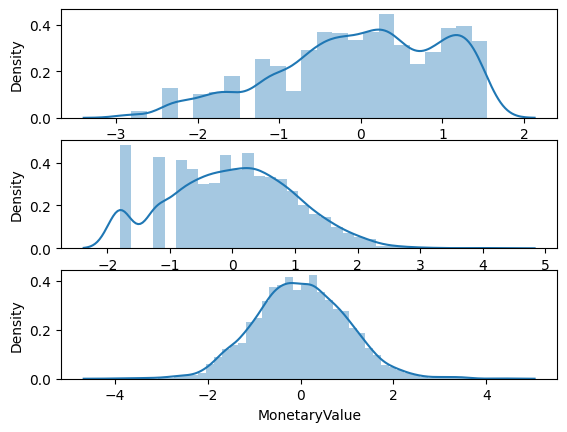

In [15]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

In [16]:
print('ok_')

ok_
